# Les indicateurs alimentaires permettent-ils de mieux manger ?

## Introduction 

À l'heure où la société contemporaine connaît une période d'abondance alimentaire, les préoccupations environnementales croissantes et les impératifs de santé publique rendent parfois le choix de l'alimentation difficile pour le consommateur. Des indicateurs alimentaires sont alors apparus pour guider le public vers des produits jugées bénéfiques pour leur santé et l'état de la planète. Trois indicateurs se sont imposés en France, chacun considérant une dimension de la qualité d'un aliment. Le plus utilisé est le Nutriscore, qui est un indicateur nutritionel. L'Ecoscore renseigne sur l'impact environnemental et le score NOVA est informe sur le degré de transformation des aliments. 

Apparu au cours de la dernière décennie, ces indicateurs nutritionnels se sont révélés être des outils précieux des politiques publiques, qui ne rechignent pas à les utiliser. Ainsi l'affichage du nutriscore a été mis en place par le gouvernement français en 2016. Néanmoins la santé alimentaire ne semble pas s'être amélioré significativement depuis la mise en place de ces indicateurs. Cela nous amène à nous demander si ces indicateurs ont réellement un effet bénéfique sur le consommateur. Notamment les notations permettent-ils vraiment de déceler des produits bons sous tous les points ? Ou ont-ils uniquement une influence sur le comportement des consommateurs ? 

Nous allons utiliser les données de la base Open Food Fact afin de mener une étude à ce sujet.
Dans un premier temps, nous allons télécharger la base et la nettoyer, afin de résoudre les problèmes liés à l'Open Data (Partie I). Puis nous avec l'aide d'analyses graphiques (Partie II), nous commencerons à formuler des hypothèses, auquelles nous répondrons à l'aide de modélisation (Partie III)

 





## Partie I : Récupération et nettoyage des données de la base Open Food Fact

# Partie I.1 : Présentation des données

### I.1.A Présentation d'Open Food Fact

Open Food Facts est une initiative collaborative mondiale visant à construire une base de données libre et ouverte sur les informations nutritionnelles et les caractéristiques des produits alimentaires. Lancé en 2012, ce projet implique la participation d'une communauté mondiale de bénévoles, de développeurs, de nutritionnistes et de passionnés de l'alimentation.

L'objectif principal d'Open Food Facts est de rendre les informations sur les produits alimentaires plus accessibles et transparentes pour les consommateurs. La base de données contient des détails tels que les ingrédients, les informations nutritionnelles, les labels (comme le Nutri-Score), les allergènes et d'autres caractéristiques pertinentes.

Les utilisateurs peuvent contribuer en ajoutant de nouvelles données, en mettant à jour les informations existantes ou en participant à d'autres aspects du projet. Open Food Facts s'efforce de promouvoir la transparence alimentaire, d'encourager des choix plus éclairés et de sensibiliser aux enjeux de santé et d'environnement liés à notre alimentation.

La base de données ainsi construite est ainsi disponible en libre accès et contient de nombreuses informations, notamment sur les scores utiliés pour noter les aliments.
Ces scores sont le Nutriscore, l'Ecoscore et le Nova_Score



### I.1.B Le Nutriscore
Le Nutri-score est un système d'étiquetage nutritionnel à cinq niveaux, allant de A à E et du vert au rouge, placé sur le devant des emballages alimentaires, établi en fonction de la valeur nutritionnelle d'un produit alimentaire. Il a pour but d'aider les consommateurs à reconnaitre la qualité nutritionnelle globale des aliments et les aider à comparer les aliments entre eux, afin de favoriser le choix de produits plus favorable à la santé et ainsi de participer à la lutte contre les maladies chroniques comme les maladies cardiovasculaires, certains cancers, l'obésité et le diabète.

Développé en 2014 par des scientifiques, ce système utilise une méthodologie basée sur des données scientifiques pour attribuer une note à chaque produit, reflétant sa qualité nutritionnelle. Les critères favorables à la santé, tels que la présence de fruits, légumes, noix, huiles bénéfiques, fibres et protéines, sont valorisés, tandis que les éléments moins favorables, tels que les calories, les acides gras saturés, les sucres ajoutés et le sodium, sont pénalisés. 

Depuis 2016, le gouvernement français et Santé Publique France poussent pour son adoption à une large échelle, sans le rendre toutefois le rendre obligatoire. 


### I.1.C : Le Score NOVA et l'Ecosore

L'Éco-Score évalue l'impact environnemental des produits alimentaires en prenant en compte des critères écologiques variés tels que l'utilisation des terres, les émissions de gaz à effet de serre et la consommation d'eau. Il vise à sensibiliser les consommateurs aux implications environnementales de leurs choix alimentaires en attribuant une note qui permet de comparer la performance écologique des produits. Il est né de la Convention citoyenne sur le climat en 2021 et est utilisé uniquement en France depuis cette date.


Le Score NOVA classe les produits alimentaires en fonction du degré de transformation qu'ils ont subi, allant de 1 à 4, 1 étant la meilleure note. Il a été mis au point en 2016 oar des scientifiques en prenant en considération des critères tels que la nature des ingrédients, le degré de transformation, la présence d'additifs et la similitude avec des aliments non transformés. Cette classification encourage les consommateurs à opter pour des aliments moins transformés et plus proches de leur état naturel, mettant en avant les potentiels impacts sur la santé associés à la consommation d'aliments fortement transformés.


## Partie I.2 Récupération des données

### I.2.A Importation des librairies Python

On commence par importer les librairies Python qu'on utilisera dans le projet pour charger et nettoyer la base 

On importe d'abord les modules nécessaires au traitement de la base et communiquer les données

In [1]:
try:
    import numpy as np
except ImportError:
    print("Module 'numpy' non trouvé. Installation en cours...")
    !pip install numpy
    import numpy as np

try:
    import pandas as pd
except ImportError:
    print("Module 'pandas' non trouvé. Installation en cours...")
    !pip install pandas
    import pandas as pd

try:
    import matplotlib.pyplot as plt
except ImportError:
    print("Module 'matplotlib' non trouvé. Installation en cours...")
    !pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except ImportError:
    print("Module 'seaborn' non trouvé. Installation en cours...")
    !pip install seaborn
    import seaborn as sns

try:
    import os
except ImportError:
    print("Module 'os' non trouvé. Installation en cours...")
    !pip install os
    import os


On importe ensuite les modules utilisés pour la modélisation

In [2]:
try:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import DBSCAN
    from sklearn.cluster import KMeans
except ImportError:
    print("Modules scikit-learn non trouvés. Installation en cours...")
    !pip install scikit-learn
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import DBSCAN
    from sklearn.cluster import KMeans

On importe la base de donnée OpenFoodFacts depuis data.gouv.fr

In [3]:
# Charger le fichier CSV
url_path = 'https://www.data.gouv.fr/fr/datasets/r/164c9e57-32a7-4f5b-8891-26af10f91072'
# Charger le fichier CSV dans un DataFrame pandas
df_openfoodfacts = pd.read_csv(url_path, sep='\t',low_memory=True)  # Assurez-vous de spécifier le bon séparateur s'il est différent de la virgule


C:\Users\luneb\AppData\Local\Temp\ipykernel_13972\2182459212.py:4: DtypeWarning: Columns (0,9,15,21,22,23,24,25,29,30,31,32,33,42,44,49,50,51,54,65,70,148) have mixed types. Specify dtype option on import or set low_memory=False.
  df_openfoodfacts = pd.read_csv(url_path, sep='\t',low_memory=True)  # Assurez-vous de spécifier le bon séparateur s'il est différent de la virgule


On vérifie que la base est bien chargée

In [ ]:
print(df_openfoodfacts.sample(5))

On veut connaître les dimensions de la base avant nettoyage

In [4]:
print ("Le dataframe compte {} lignes et {} variables".format(df_openfoodfacts.shape[0], df_openfoodfacts.shape[1]))


Le dataframe compte 3038621 lignes et 204 variables


### I.2.B Nettoyage 

On a un nombre important de données et de variables. Néanmoins la base de données est remplis en partie par des amateurs : la qualité des observations varie donc. On va donc uniquement conservé les données de bonne qualité nécessaire. 

On commence le nettoyage de la base de donnée OpenFoodFacts: on souhaite garder uniquement les produits qui sont vendus en France 

On commence par regarder les valeurs prises par la variable countries_tags, ce qui nous facilitera par la suite  le traitement

In [5]:
# Obtention des valeurs distinctes de la colonne 'countries_tags' sans les valeurs nulles
valeurs_distinctes =df_openfoodfacts['countries_tags'].dropna().drop_duplicates().tolist()

# Tri des valeurs distinctes en ordre alphabétique
valeurs_distinctes.sort()

for valeur in valeurs_distinctes:
    print(valeur)




en:afghanistan
en:afghanistan,en:belgium,en:france
en:afghanistan,en:finland,en:france,en:sweden
en:afghanistan,en:france
en:afghanistan,en:france,en:french-guiana
en:afghanistan,en:france,en:germany
en:afghanistan,en:france,en:germany,en:spain
en:afghanistan,en:france,en:reunion
en:afghanistan,en:france,en:romania
en:afghanistan,en:france,en:spain
en:afghanistan,en:france,en:switzerland
en:aland-islands
en:aland-islands,en:australia,en:denmark,en:finland,en:france,en:netherlands,en:singapore,en:sweden,en:united-kingdom
en:aland-islands,en:australia,en:denmark,en:finland,en:france,en:norway,en:sweden,en:united-kingdom
en:aland-islands,en:bulgaria,en:finland,en:germany,en:ireland,en:montenegro,en:portugal,en:romania,en:serbia
en:aland-islands,en:denmark,en:norway,en:sweden
en:aland-islands,en:finland
en:aland-islands,en:finland,en:france,en:germany,en:sweden,en:switzerland
en:aland-islands,en:finland,en:sweden
en:aland-islands,en:france
en:aland-islands,en:sweden
en:albania
en:albania,e

Nous avons obtenu la liste des pays où chaque produit est vendu. Au regard de la très grande diversité des produits et des pays de vente, nous avons décidé de se concentrer uniquement sur les produits vendus sur un seul marché, ici la France. 

Ce choix est pertinent pour plusieurs raisons . La France est en effet un pays où les étiquetages alimenataires sont très répandus et sont intégrés aux politiques publiques. De plus, les observations de produits français sont très présent dans la base Open food fact. Cela s'explique par l'origine hexagonale du projet et des campagnes de collectes de données menées par l'Agence Santé France.

En se focalisant sur les produits vendus en France, notre analyse se concentre de manière exclusive sur un marché unique. Cette approche garantit une comparaison pertinente entre les produits, facilitant ainsi l'interprétation des résultats. En outre, elle permet de maintenir la cohérence des données tout en assurant un volume suffisant pour des analyses approfondies.

On ne conserve ainsi que les produits uniquement vendus en France. 

In [6]:
# Filtrer le DataFrame pour ne conserver que les lignes avec 'en:france' dans la colonne 'countries_tags'
df_france = df_openfoodfacts[df_openfoodfacts['countries_tags'] == 'en:france']
# Afficher les premières lignes du DataFrame résultant
print(df_france.head())

#on veut connaître la taille de la base
print ("Le dataframe compte {} lignes et {} variables".format(df_france.shape[0], df_france.shape[1]))


                    code                                                url  \
0      00000000000000225  http://world-fr.openfoodfacts.org/produit/0000...   
3   00000000000026772226  http://world-fr.openfoodfacts.org/produit/0000...   
4          0000000000017  http://world-fr.openfoodfacts.org/produit/0000...   
5          0000000000031  http://world-fr.openfoodfacts.org/produit/0000...   
11         0000000000100  http://world-fr.openfoodfacts.org/produit/0000...   

           creator   created_t      created_datetime  last_modified_t  \
0   nutrinet-sante  1623855208  2021-06-16T14:53:28Z       1692101569   
3          kiliweb  1654250311  2022-06-03T09:58:31Z       1654270474   
4          kiliweb  1529059080  2018-06-15T10:38:00Z       1561463718   
5         isagoofy  1539464774  2018-10-13T21:06:14Z       1539464817   
11           del51  1444572561  2015-10-11T14:09:21Z       1444659212   

   last_modified_datetime last_modified_by                  product_name  \
0    2023-

On souhaite visualiser d'un coup d'oeil les variables d'intérêt de la base de donnée: quelles variables pourrons nous être utiles pour notre analyse? lesquelles sont assez remplies pour nous être utiles? 

On va créer une fonction qui calcule le taux de remplissage de chaque variable 

In [ ]:
def null_factor(df):
  null_rate = ((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False).reset_index()
  null_rate.columns = ['Variable','Taux_de_Null']
  return null_rate

Nous alllons désormais commencer à nettoyer la base de données en enlevant les colonnes peu remplies. 

Avant cela, on souhaite faire une représentation graphique qui nous permettra d'identifier d'un coup d'oeil les variables qui sont pertinentes par comparaison aux variables peu, voir pas remplies mais qui paraissent intéressantes. 

In [7]:
#On calcule le taux de remplissage de chaque variable 
filling_features = null_factor(df_france)
filling_features["Taux_de_Null"] = 100-filling_features["Taux_de_Null"]
filling_features = filling_features.sort_values("Taux_de_Null", ascending=False) 

#Seuil de suppression
sup_threshold = 10

#On affiche graphiquement  le taux de remplissages des variables en fonction d'un seuil de référence
fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")
#Seuil pour suppression des varaibles
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize = 16, color = 'r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()

NameError: name 'null_factor' is not defined

On va supprimer les colonnes qui ne sont pas remplies à + de 10%. On va notamment se débrasser d'information sur la présence de nutriments et de vitamines mais le faible remplissage de ces colonnes ne permet pas de traitement sur un nombre intéreesant de données.  

In [ ]:
#On ne décide de ne garder que les colonnes remplis à plus de 10%
seuil = 10  
filled_variables = list(filling_features.loc[filling_features['Taux_de_Null'] >= seuil, 'Variable'].values)

#Nouveau Dataset avec les variables conservées
df_france = df_france[filled_variables]

# Affichage du résultat
print ("Le dataframe df_france compte {} lignes et {} variables".format(df_france.shape[0], df_france.shape[1]))

for column_name in df_france.columns:
    print(column_name)

Le dataframe df_france compte 925343 lignes et 73 variables
code
states_tags
countries_tags
countries
created_t
states
countries_fr
states_fr
url
last_modified_datetime
last_modified_t
created_datetime
creator
completeness
pnns_groups_2
pnns_groups_1
ecoscore_grade
nutriscore_grade
product_name
last_image_datetime
last_image_t
last_modified_by
image_url
image_small_url
energy_100g
saturated-fat_100g
sugars_100g
proteins_100g
fat_100g
carbohydrates_100g
energy-kcal_100g
sodium_100g
salt_100g
image_nutrition_small_url
image_nutrition_url
brands
brands_tags
image_ingredients_small_url
image_ingredients_url
main_category_fr
main_category
categories_tags
categories
categories_fr
food_groups_tags
food_groups_fr
food_groups
unique_scans_n
popularity_tags
labels
labels_tags
labels_fr
nutrient_levels_tags
nutriscore_score
nutrition-score-fr_100g
ecoscore_score
quantity
product_quantity
ingredients_analysis_tags
additives_n
ingredients_text
fruits-vegetables-nuts-estimate-from-ingredients_100g
i

On allège de nouveau la base de donnée en enlevant les variables qui ne nous intéressent pas pour la suite (celles qui contiennent des images des produits notamment par exemple et qui consomment beaucoup de place)

In [ ]:
# Sélectionner les colonnes spécifiques
#On ne garde que les observations où les informations utiles (informations nutritionnelles et scores) sont bien complétées  

selected_columns = ['code', "created_datetime",'countries_tags', 'ecoscore_grade', 'nutriscore_grade', 'product_name',
                     'energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g',
                     'fat_100g', 'carbohydrates_100g', 'energy-kcal_100g', 'sodium_100g', 'salt_100g',
                     'food_groups_tags', 'labels_tags', 'nutriscore_score', 'nutrition-score-fr_100g',
                     'ecoscore_score', 'ingredients_text', 'nova_group', 'fiber_100g', "additives_n"]

# Créer le DataFrame final
df_france= df_france[selected_columns]

On a un grand nombre d'observations. On ne va donc conserver que les observations qui possèdent suffisament d'observations pour être exploitable.

In [ ]:
#On enlève les observations incomplètes

for variable in selected_columns : 
    df_france = df_france[(df_france[variable].notnull())]
    df_france[(df_france[variable] != 'unknown') & (df_france[variable] != 'not-applicable')]


print ("Le dataframe df_france compte désormais {} lignes et {} variables".format(df_france.shape[0], df_france.shape[1]))


        energy_100g  saturated-fat_100g   sugars_100g  proteins_100g  \
count  42787.000000        42787.000000  42787.000000   42787.000000   
mean    1132.018258            4.829020     12.023320       8.096776   
std      754.300248            7.401708     16.855286       7.347363   
min        0.000000            0.000000      0.000000       0.000000   
25%      463.500000            0.300000      1.000000       2.300000   
50%     1050.000000            1.740000      3.800000       6.500000   
75%     1682.000000            6.100000     17.000000      11.100000   
max     8276.000000           66.200000    100.000000      86.000000   

           fat_100g  carbohydrates_100g  energy-kcal_100g   sodium_100g  \
count  42787.000000        42787.000000      42787.000000  42787.000000   
mean      13.061726           29.010391        270.775694      0.313695   
std       16.176711           26.866896        181.286766      0.617391   
min        0.000000            0.000000          0.

On continue le nettoyage de la base en enlevant les valeurs abérrantes.

Open food fact est une base open source ouverte à tous et collaborative. Il n'est pas abérrant de penser que des erreurs ont pu se produire lors  de l'entrée de certaines données, notamment sur les infomations nutritionelles.

On créé une fonction qui se charge de supprimer les valeurs nutritionnelles aberrantes dans le cas des mesures pour 100g (pour 100g d'un produit, il ne peut pas contenir + de 100g ou une valeur négative de nutriment)

In [ ]:
def suppression_aberrations(df):
    # Cette fonction supprime les observations où les valeurs sont aberrantes

    var_pour_100g = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']
    for var in var_pour_100g:
        df = df[(df[var] >= 0) & (df[var] <= 100)]
      

    return df


On regarde combien d'observations étaient abérrantes pour vérifier que cela n'enlève pas un nombre anormal de lignes (pas très cohérent avec la notion de "valeurs aberrantes" sachant qu'on s'attend à des exceptions)

In [ ]:

ni=df_france.shape[0] 

# Appliquer la fonction sur le DataFrame
df_france = suppression_aberrations(df_france)

nf=df_france.shape[0]

delta_lignes=ni-nf #Controle du nombre de lignes supprimées 

print(delta_lignes,"lignes considérées comme des abérrations et donc supprimées")


2 lignes considérées comme des abérrations et donc supprimées


### I.2.C Ajout de nouvelles variables

On va désormais ajouter des variables utiles pour nos analyses. 
On commence par transformer le Nutriscore et l'Ecoscore (qui sont des notations en lettre) en une notation numétique de 1 à 5, sauvé respectivement dans les variables `nutriscore_num`  et  `ecoscore_num`

On commence par créé la fonction qui se chargera de transformer les variables de score à lettre en variable de score à chiffre 

In [ ]:
#Transformons le Nutriscore et l'ecoscore en variable quantitative, ce qui sera utile pour faire des régressions
def convertion_num_score(lettre):
    if lettre =="a":
        score=1
    elif lettre == "b":
        score=2
    elif lettre == "c":
        score=3
    elif lettre == "d":
        score=4
    elif lettre == "e":
        score=5
    else:
        score=np.nan
    return score

On l'applique au nutriscore et à  l'écoscore

In [ ]:
df_france["nutriscore_num"]=df_france['nutriscore_grade'].apply(convertion_num_score)
df_france["ecoscore_num"]=df_france['ecoscore_grade'].apply(convertion_num_score)

On créé une nouvelle variable <code>superscore

Elle est la synthèse des trois scores utiliées : Nova-score, Nutriscore et Ecoscore

On utilise la formule suivante : super_score = Nova-score + Nutriscore + Ecoscore

In [ ]:
df_france['super_score'] = df_france['ecoscore_num'].astype(int) + df_france['nova_group'].astype(int) + df_france['nutriscore_num'].astype(int)

Finalement, on affiche des informations sur la base finale sous la forme d'un graphique pour nous permettre de vérifier d'un coup d'oeil que toutes nos variables sont bien remplies pour la suite 

C:\Users\luneb\AppData\Local\Temp\ipykernel_20328\3682924042.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")


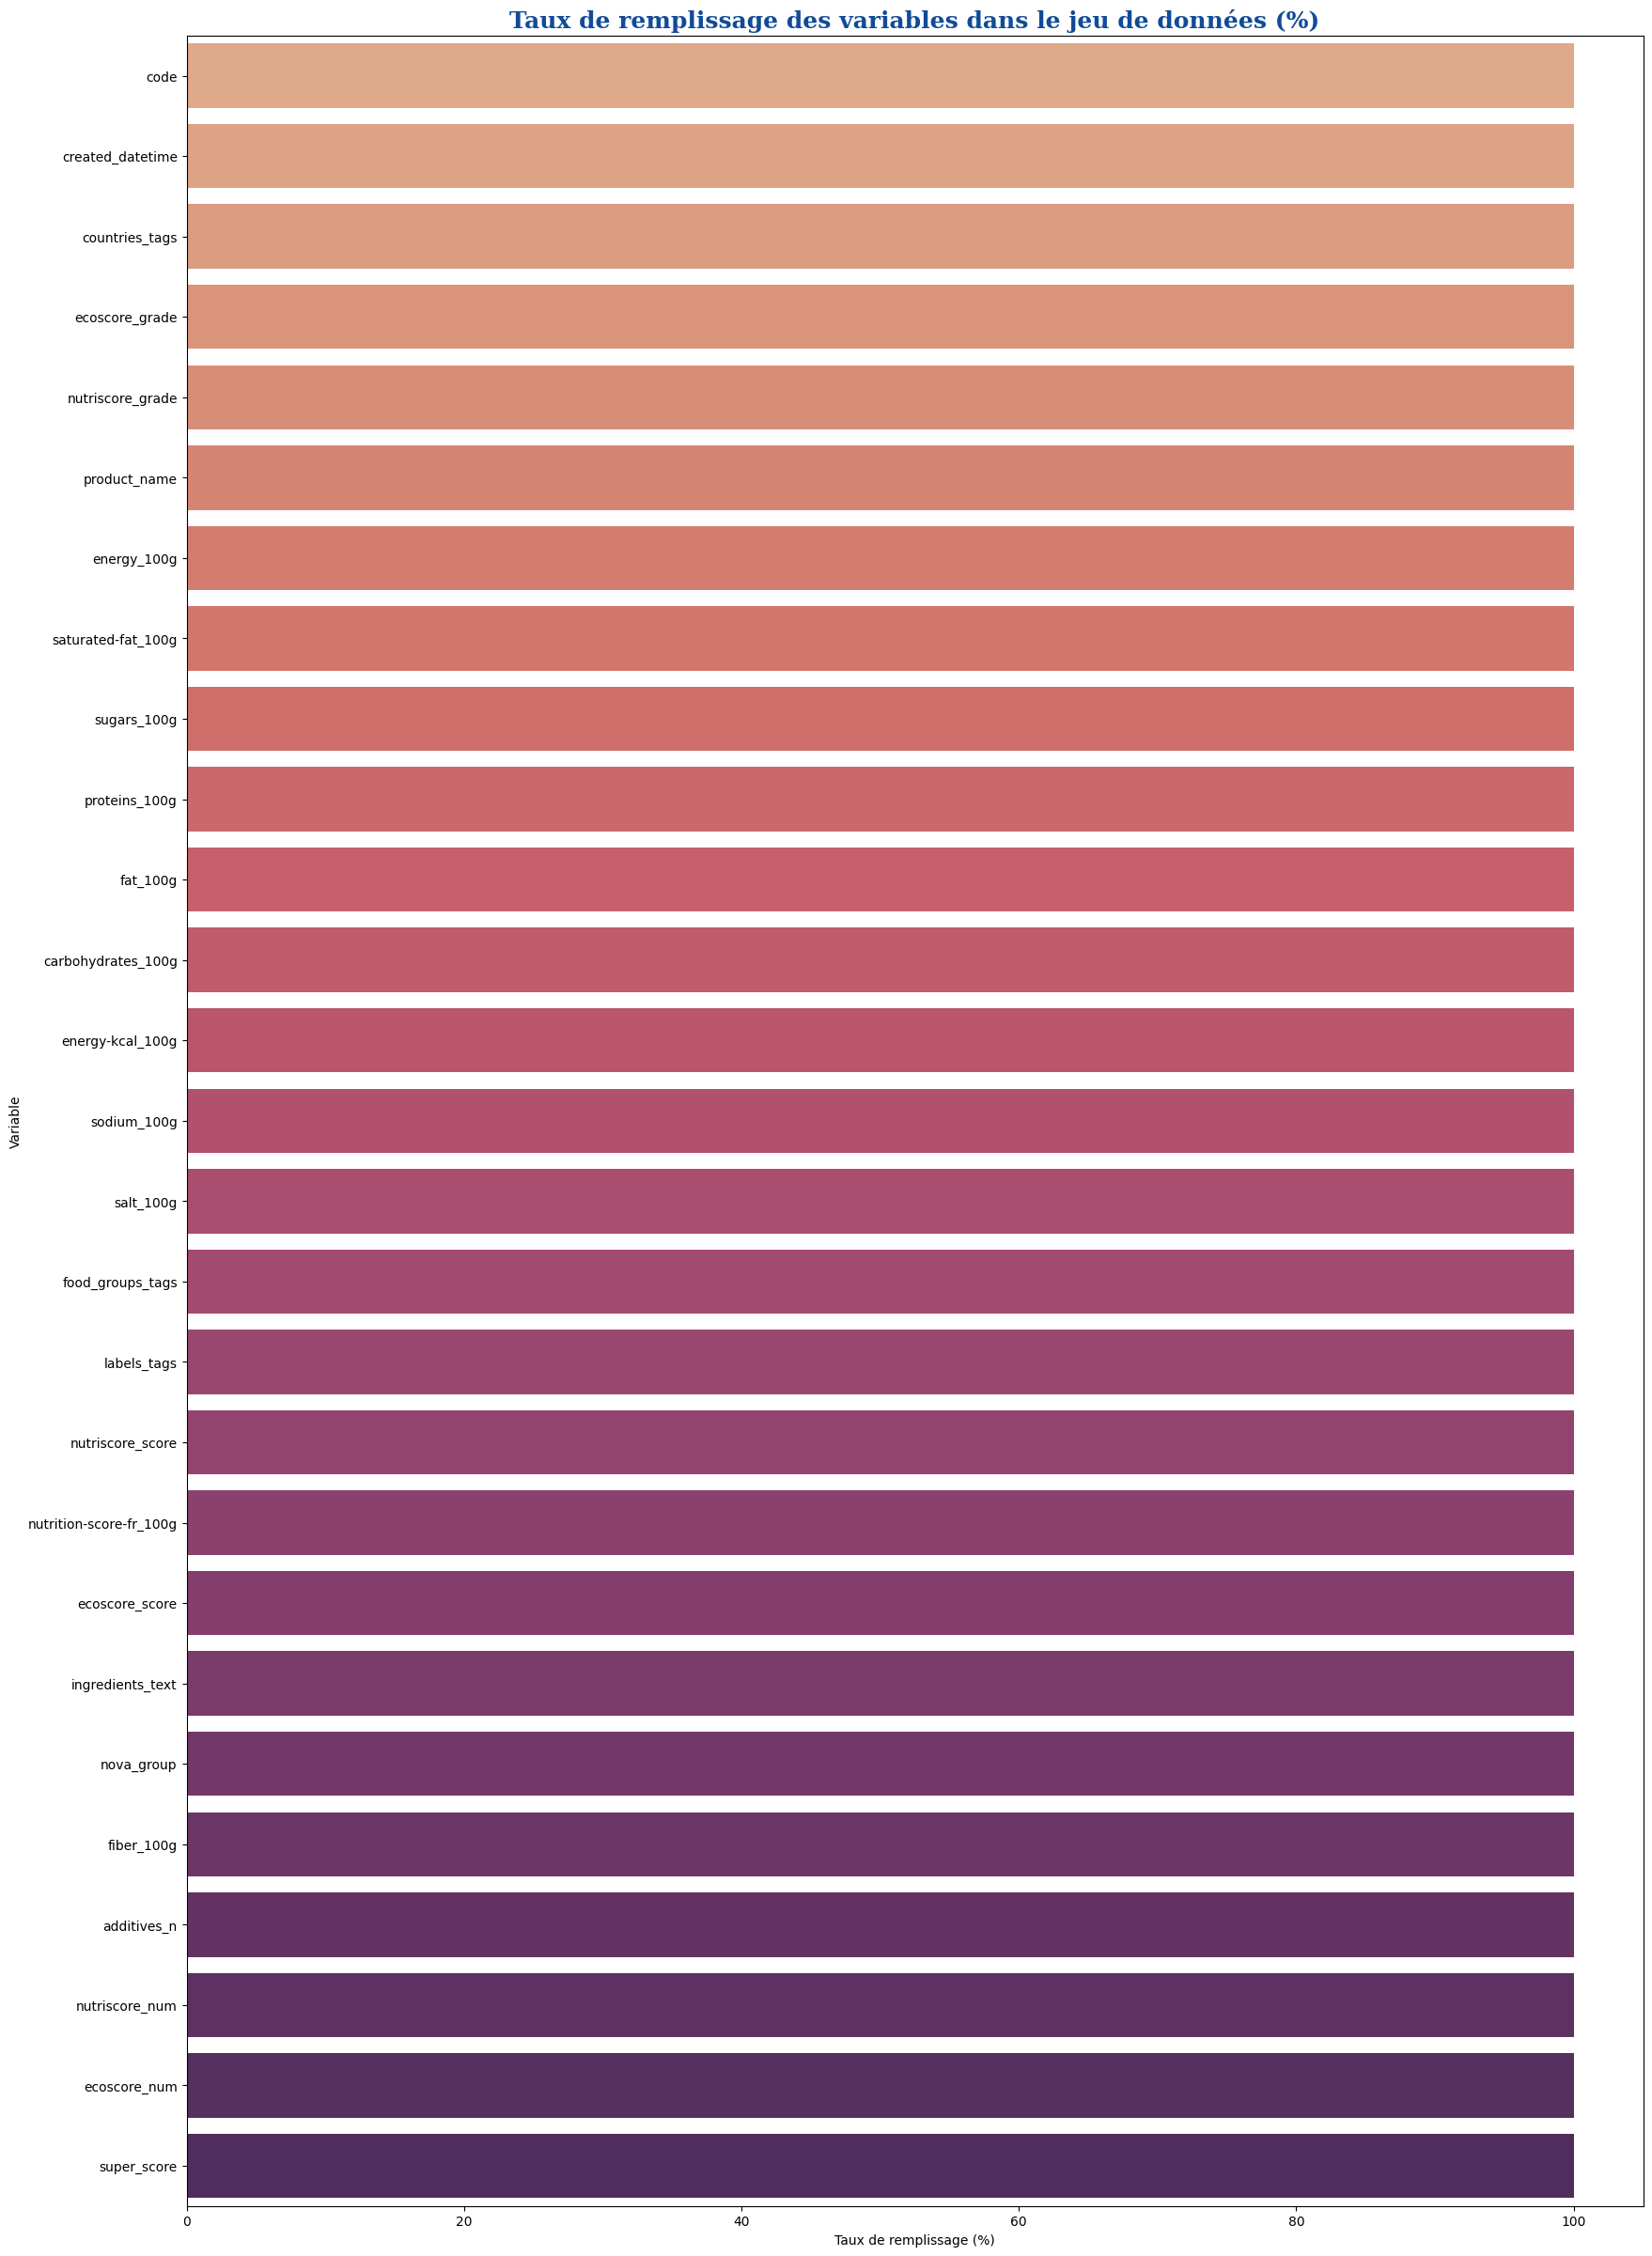

In [ ]:
filling_features = null_factor(df_france)
filling_features["Taux_de_Null"] = 100-filling_features["Taux_de_Null"]
filling_features = filling_features.sort_values("Taux_de_Null", ascending=False) 
fig = plt.figure(figsize=(20, 30))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()

On vérifie une dernière fois les dimensions de la base de donnée pour vérifier que nous disposons d'assez de données pour faire des analyses pertinentes dans la suite du projet 

In [ ]:
print ("Le dataframe df_france est passé de {} lignes et {} variables à {} lignes et {} variables".format(df_openfoodfacts.shape[0], df_openfoodfacts.shape[1],df_france.shape[0], df_france.shape[1]))
print ("On a enlevé {} observations et {} variables ".format(df_openfoodfacts.shape[0] - df_france.shape[0], df_openfoodfacts.shape[1]-df_france.shape[1]))

Le dataframe df_france est passé de 3038621 lignes et 204 variables à 42785 lignes et 27 variables
On a enlevé 2995836 observations et 177 variables 


On enregistre la base de donnée dans le dossier du script pour l'avoir en local 

Pour cela on créé une fonction qui prend en entrée le nom du fichier jupiter qui est run actuellement (pas uniquement le fichier mère mais aussi ses copies qui peuvent avoir changé de nom )

In [ ]:
def get_notebook_name():
    """
    Obtient le nom du notebook en cours d'exécution dans un environnement Jupyter.
    """
    path = os.path.abspath("les indicateurs alimentaires permettent-ils de mieux manger.ipynb")
    return os.path.basename(path)

get_notebook_name()

'les indicateurs alimentaires permettent-ils de mieux manger.ipynb'

Cette fonction sera utilisée pour enregistrer par défaut la base de donnée lorsque l'utilisateur n'a pas renseigné de lui-même un dossier (absolu ou relatif) pour stocker la base de donnée 

In [ ]:
def enregistre(dataframe, chemin=None):
    try:
        if chemin is None:
            # Si aucun chemin n'est spécifié, utilise le dossier du script avec le nom par défaut
            chemin_script = os.path.dirname(os.path.abspath(get_notebook_name()))
            chemin_complet = os.path.join(chemin_script, "df_france.csv")
        else:
            # Si un chemin est spécifié, vérifie s'il est relatif et le rend absolu si nécessaire
            chemin_complet = os.path.abspath(chemin)

        print(f"Chemin d'origine : {chemin}")
        print(f"Chemin absolu : {chemin_complet}")

        dataframe.to_csv(chemin_complet, index=False)
        print(f"Le fichier CSV a été sauvegardé avec succès à l'emplacement : {chemin_complet}")
        return chemin_complet
    except Exception as e:
        print(f"Erreur lors de l'enregistrement du fichier CSV : {e}")


#par défaut on enregistre dans le même dossier que là où il y a le script 
path_to_df = enregistre(df_france)


Chemin d'origine : None
Chemin absolu : c:\Users\luneb\Documents\ENSAE\2A\S1\projet PPDS\Projet-Python-pour-la-data-science\df_france.csv
Le fichier CSV a été sauvegardé avec succès à l'emplacement : c:\Users\luneb\Documents\ENSAE\2A\S1\projet PPDS\Projet-Python-pour-la-data-science\df_france.csv


# Téléchargement de la base nettoyée

In [ ]:
#On peut désormais charger cette base

df_france = pd.read_csv(path_to_df)


## Documentation des Variables de la Base de Données

Ce document fournit une documentation détaillée sur les principales variables présentes dans la base de données. Ces variables représentent différentes caractéristiques nutritionnelles et des informations connexes pour les produits alimentaires inclus dans la base.

### Variables Principales
`code`
Le code unique attribué à chaque produit dans la base de données.

`created_datetime`
La date et l'heure de création de l'observation.

`countries_tags`
Les tags des pays associés au produit.

`ecoscore_grade`
Le grade de l'Ecoscore attribué au produit.

`nutriscore_grade`
Le grade du Nutri-Score attribué au produit.

`product_name`
Le nom du produit.

 `energy_100g`
L'énergie en grammes pour 100 grammes du produit.

`saturated-fat_100g`
La quantité de graisses saturées pour 100 grammes du produit.

 `sugars_100g`
La quantité de sucres pour 100 grammes du produit.

`proteins_100g`
La quantité de protéines pour 100 grammes du produit.

`fat_100g`
La quantité de matières grasses pour 100 grammes du produit.

`carbohydrates_100g`
La quantité de glucides pour 100 grammes du produit.

`energy-kcal_100g`
L'énergie en kilocalories pour 100 grammes du produit.

`sodium_100g` et `salt_100g`
La quantité de sodium et de sel pour 100 grammes du produit.

`food_groups_tags`
Les tags des groupes alimentaires associés au produit.

`labels_tags`
Les tags des labels associés au produit.

`nutriscore_score`
Le score du Nutri-Score attribué au produit.

`nutrition-score-fr_100g`
Le score nutritionnel pour 100 grammes du produit selon le système français.

`ecoscore_score`
Le score de l'Ecoscore attribué au produit.

`ingredients_text`
La liste des ingrédients du produit.

`nova_group`
Le groupe NOVA classifiant le degré de transformation des aliments.

`fiber_100g`
La quantité de fibres pour 100 grammes du produit.

`additives_n`
Le nombre d'additifs dans le produit.

`nutriscore_num`
La note du Nutriscore dans un format numérique

`ecoscore_num`
La note de l'Ecoscore dans un format numérique

`super_score`
Un score synthétique de la qualité des produits

Cette documentation vise à faciliter la compréhension des différentes variables présentes dans la base de données, facilitant ainsi l'analyse et l'exploration des données nutritionnelles.



## Partie 2 : Une première description de la base 


On réalise désormais des statistiques descriptives 
On commence par étudier le Nutriscore, qui est le principal score utilisé pour déterminer la qualitée nutritionnelles 


## II.1 Visualisation de la base

Grâce à l'usage de graphiques, on va pouvoir analyser les informations contenues dans la base qu'on a obtenu. 

On créé une fonction plot_pie qui nous évite de refaire le même code pour les différentes variables qu'on souhaite étudier. 

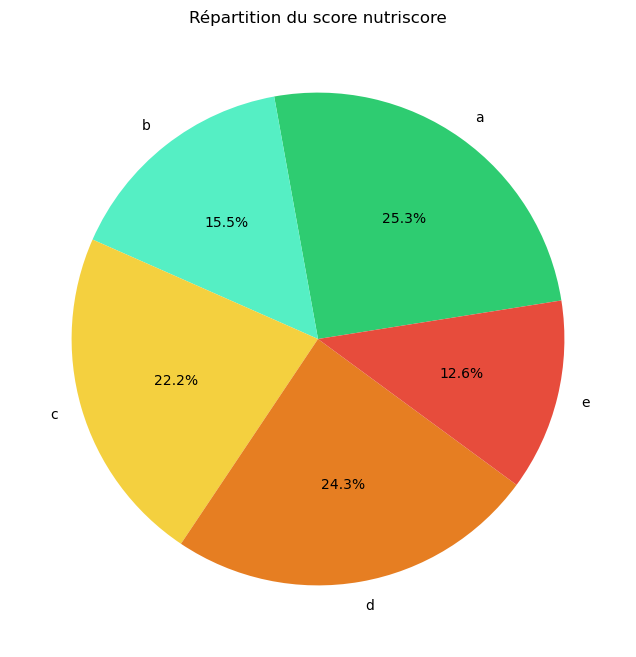

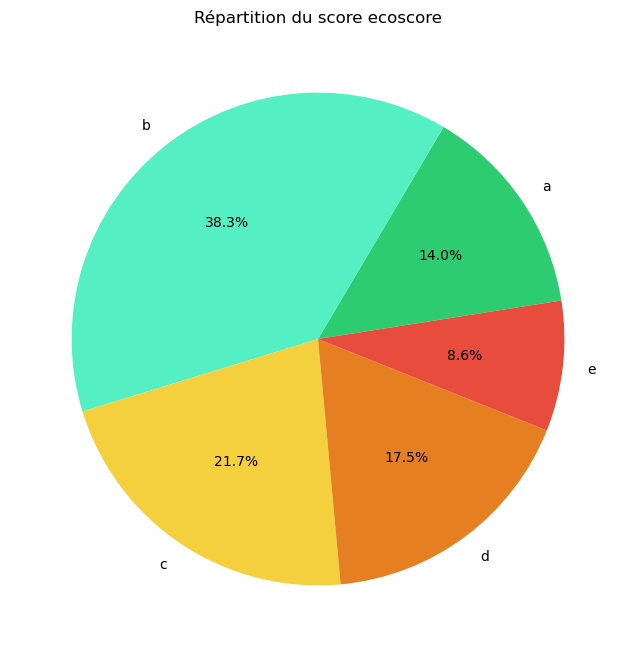

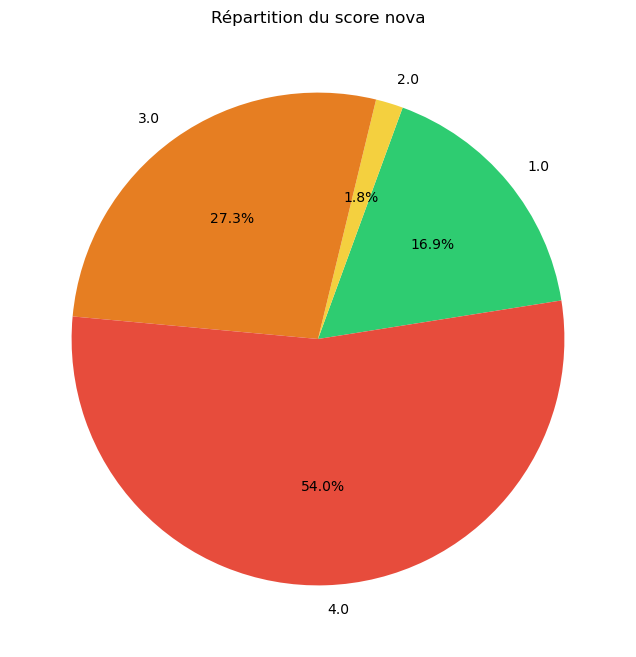

In [ ]:
#Grâce à des diagrammes circulaires, on observe la répartition des scores dans la base

def plot_pie(score):
    # Filtrer les données pour exclure la catégorie 'Unknown' et 'non-applicable'

    data_graph = df_france

    # Compter les occurrences des valeurs dans la colonne 'nutriscore_grade' et trier par index (ordre alphabétique)
    score_counts = data_graph[score].value_counts().sort_index()

    nutriscore_colors = {'a': '#2ecc71', 'b': '#55efc4', 'c': '#f4d03f', 'd': '#e67e22', 'e': '#e74c3c', '1.0': '#2ecc71', '2.0': '#f4d03f', '3.0': '#e67e22', '4.0': '#e74c3c','1': '#2ecc71', '2': '#f4d03f', '3': '#e67e22', '4': '#e74c3c', '5': '#8e44ad'}
    colors = [nutriscore_colors.get(str(category), '#95a5a6') for category in score_counts.index]

    # Créer le diagramme circulaire avec les couleurs spécifiques du Nutri-Score
    plt.figure(figsize=(8, 8))
    plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=9, colors=colors)
    score_name = score.split("_")
    plt.title('Répartition du score ' + score_name[0])
    plt.show()


On affiche d'abord le nutriscore 

In [ ]:
plot_pie("nutriscore_grade")

Puis l'écoscore 

In [ ]:
plot_pie("ecoscore_grade")

et enfin le novascore 

In [ ]:
plot_pie("nova_group")

Les diagrammes permettent d'explorer la composition actuelle de la base de données. Plusieurs observations peuvent être formulées concernant les produits alimentaires vendus en France et leur qualité.

Tout d'abord, une part significative des aliments commercialisés présente une qualité nutritionnelle appréciable, avec près d'un tiers d'entre eux obtenant les notes A ou B. Cependant, il est important de noter que subsiste un nombre considérable de produits mal évalués, avec 17,5 % d'entre eux affichant la note D.

L'impact écologique de l'alimentation en France semble relativement maîtrisé, puisque plus de 50 % des produits obtiennent les notes A ou B.

Néanmoins, une part substantielle des aliments consommés dans le pays est soumise à une transformation importante. En effet, plus de la moitié des produits se voient attribuer la note la plus basse selon le score NOVA, tandis que moins de 17 % affichent une note de 1.

Ainsi, bien que l'alimentation française ne se distingue pas particulièrement dans chacun des domaines nutritionnels, écologiques et de transformation des produits, elle ne peut être qualifiée de médiocre non plus.

Il est intéressant de noter que la répartition des notes varie considérablement selon les catégories, laissant supposer une corrélation très faible entre les différents scores.



Sachant que ces scores existent depuis plusieurs années maintenant, on souhaiterait savoir si la proportion d'aliments classés en A change (augmente par exemple) avec les années. En effet, on pourrait se dire qu'afin de mieux vendre, les industriels changeraient leurs recettes pour avoir un meilleur score. 

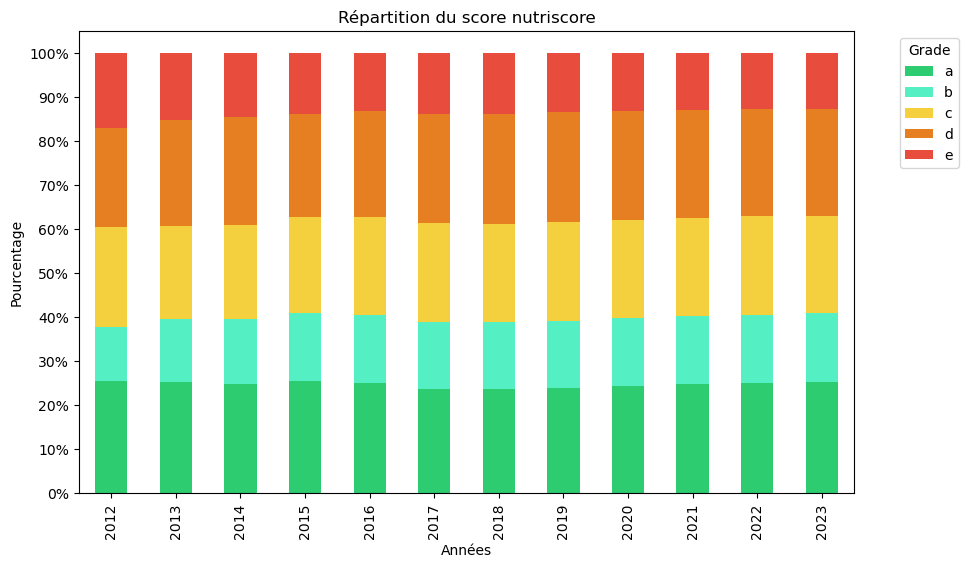

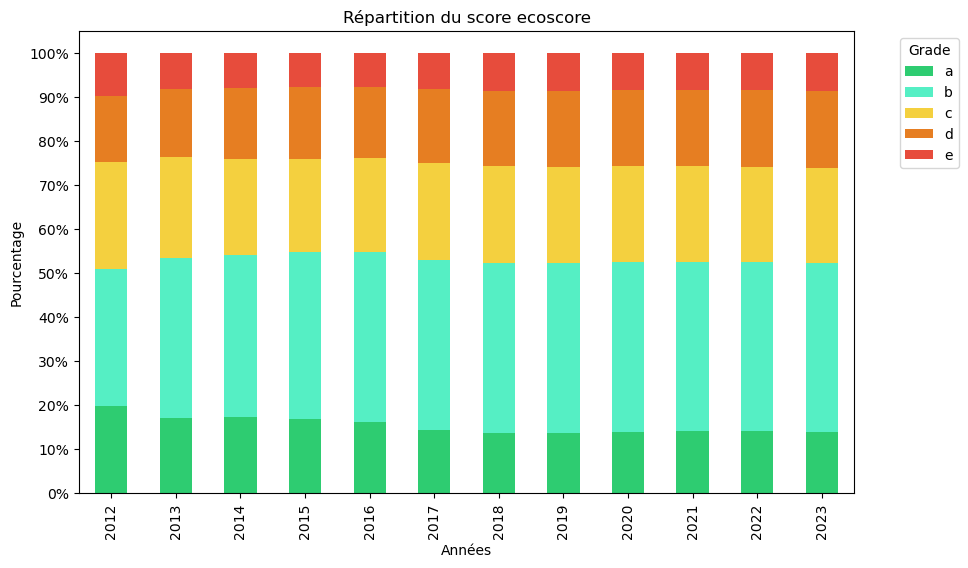

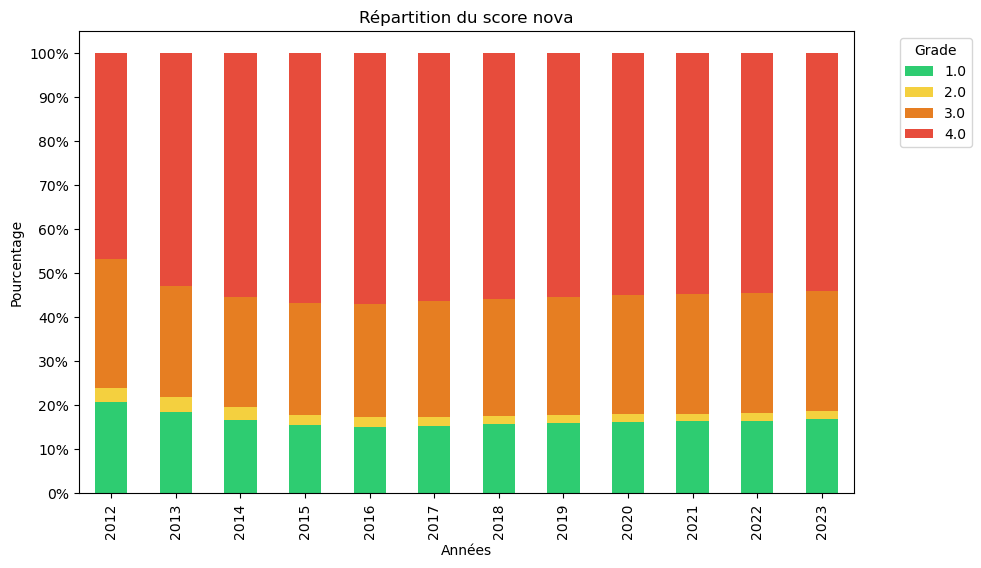

In [ ]:
def time_evolution(score):

    df_france['created_datetime'] = pd.to_datetime(df_france['created_datetime'])

    # Filtrer les données pour exclure la catégorie 'Unknown' et 'non-applicable'
    data_graph = df_france[(df_france[score] != 'unknown') & (df_france[score] != 'not-applicable')]

    # Make sure the 'created_datetime' column is in datetime format
    df_france['created_datetime'] = pd.to_datetime(df_france['created_datetime'])


    data_graph['year'] = data_graph['created_datetime'].dt.year
    
       
    # On crée un nouveau dataframe pour manipuler les données utiles pour le graphique
    cumulative_df = pd.DataFrame(index=data_graph['year'].unique(), columns=data_graph[score].unique())

    # On calcule le nombre d'occurences par note et par an 
    for year in cumulative_df.index:
        year_data = data_graph[data_graph['year'] <= year]
        counts = year_data[score].value_counts(normalize=True) * 100  # Calculate percentages
        cumulative_df.loc[year] = counts

    # On affiche les années dans l'ordre
    cumulative_df.sort_index(inplace=True)
    cumulative_df = cumulative_df[sorted(cumulative_df.columns)]


    #On affiche le graphique 
    nutriscore_colors = {'a': '#2ecc71', 'b': '#55efc4', 'c': '#f4d03f', 'd': '#e67e22', 'e': '#e74c3c',
                         '1.0': '#2ecc71', '2.0': '#f4d03f', '3.0': '#e67e22', '4.0': '#e74c3c', '5.0':'#8e44ad'}

    colors = [nutriscore_colors.get(str(category), '#95a5a6') for category in data_graph[score].value_counts().sort_index().index]
    
    cumulative_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
    
    #On affiche le titre et la légende
    score_name = score.split("_")
    plt.title('Répartition du score ' + score_name[0]) 
    plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylabel('Pourcentage')
    plt.xlabel('Années')
    plt.yticks(range(0, 101, 10), [f'{i}%' for i in range(0, 101, 10)])

    plt.show()


On regarde l'évolution de la répartition du nutriscore les différentes années 

In [ ]:
time_evolution("nutriscore_grade")

Puis on regarde l'écoscore

In [ ]:
time_evolution("ecoscore_grade")

et enfin le nova score 

In [ ]:
time_evolution("nova_group")

Ces histogrammes permettent de voir l'évolution de la répartition des notes dans le temps


On observe aucune évolution majeure au cours du temps : l'introduction des scores n'ont pas bouleversé le marché alimentaire français.

On peut néanmoins constaté une hausse faible du nombre de produits de Nutriscore A ou B depuis 2016, qui peut être expliqué par la généralisation de l'affichage du nutriscor en France. 

On observe une amélioration du score environnemental des produits vendus en France depuis 2012. Néanmoins cette amélioration commence avant l'introduction de l'écoscore, elle s'explique par d'autres facteurs, comme la prise de conscience des consommateurs ou la mise en place de nouvelles régulations.


Ce qui serait intéressant désormais, c'est de connaître la répartition en pourcentage des scores des ajouts annuels de produits, offrant une vue sur la catégorie qui connaît la plus forte croissance chaque année. Ces visualisations permettent d'identifier des tendances claires dans la qualité des produits industriels chaque année

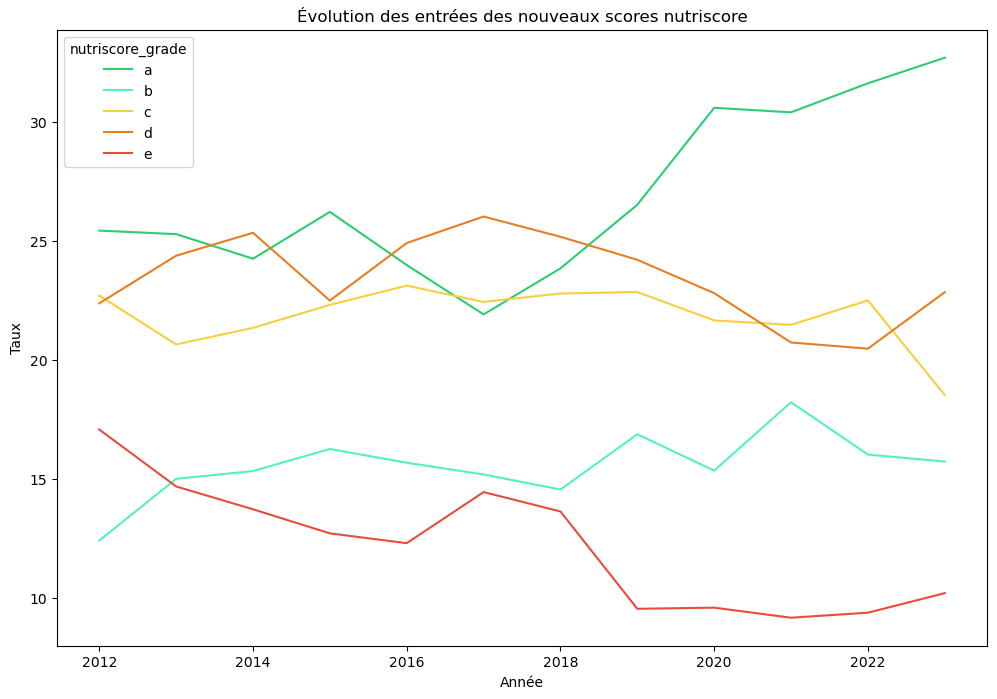

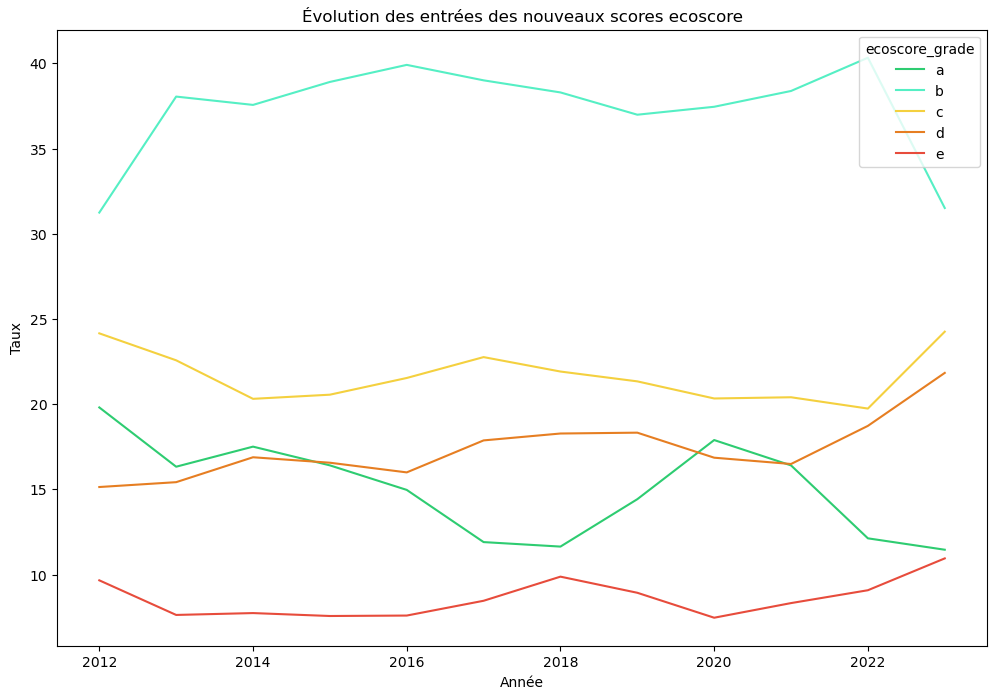

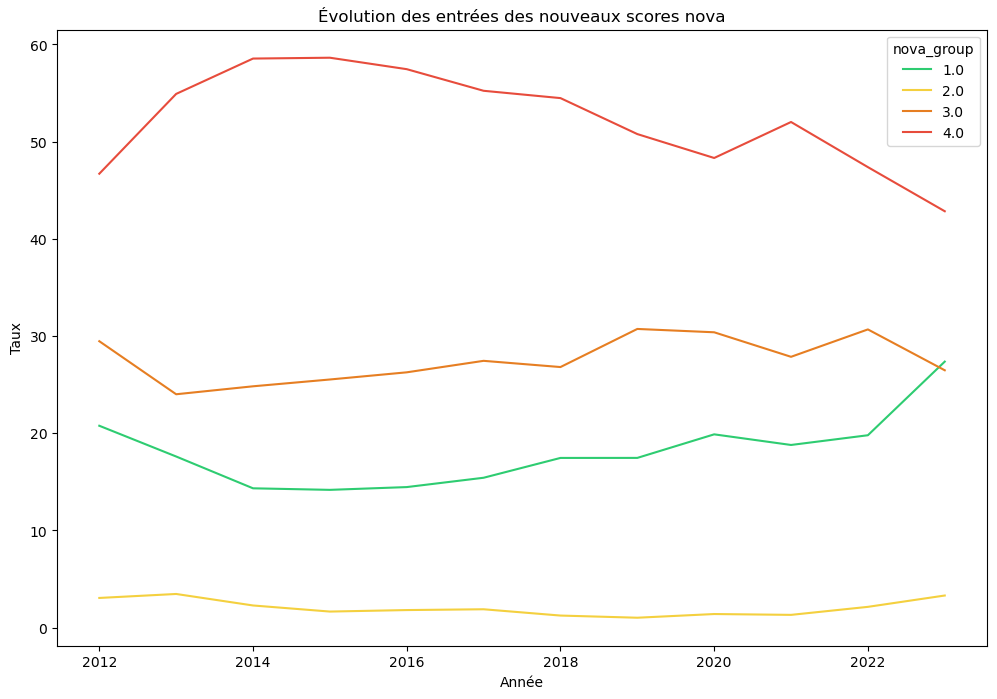

In [ ]:
def new_evolution_time(score):
    data_graph = df_france

    # Calcul du nombre d'occurrences (unique) par score et par année
    score_per_year = data_graph.groupby(by=[score, data_graph['created_datetime'].dt.year])['code'].nunique().reset_index()

    # Calcul du nombre d'occurrences (unique) total par année
    cum_per_year = data_graph.groupby(by=data_graph['created_datetime'].dt.year)['code'].nunique().reset_index()

    #Fusion 
    score_per_year = pd.merge(score_per_year, cum_per_year, how="left", left_on="created_datetime", right_on="created_datetime")
    score_per_year = score_per_year.rename(columns={'created_datetime': 'year', 'code_x': 'nb_score', 'code_y': 'total_grade'})
    score_per_year['score_rate'] = (score_per_year['nb_score'] / score_per_year['total_grade']) * 100

    #Définition de la palette de couleur
    nutriscore_colors = {'a': '#2ecc71', 'b': '#55efc4', 'c': '#f4d03f', 'd': '#e67e22', 'e': '#e74c3c', '1.0': '#2ecc71', '2.0': '#f4d03f', '3.0': '#e67e22', '4.0': '#e74c3c'}
    colors = [nutriscore_colors.get(str(category), '#95a5a6') for category in score_per_year[score].value_counts().sort_index().index]

    fig = plt.figure(figsize=(12, 8))
    ax = sns.lineplot(x='year', y='score_rate', hue=score, data=score_per_year, palette = colors)
    plt.xlabel("Année")
    plt.ylabel("Taux")

    score_name = score.split("_")
    plt.title('Évolution des entrées des nouveaux scores ' + score_name[0])

    plt.show()


Regardons pour la répartition en pourcentage des scores des ajouts annuels de produits pour le nutriscore 

In [ ]:
new_evolution_time("nutriscore_grade")

Puis pour l'écoscore 

In [ ]:
new_evolution_time("ecoscore_grade")

et enfin pour le novascore 

In [ ]:
new_evolution_time("nova_group")

Il est notable que l'initiative des autorités publiques visant à promouvoir largement le Nutriscore se reflète dans les données. Depuis 2017, les produits notés A sont les plus fréquemment ajoutés, bien que leur nombre demeure encore insuffisant pour constituer la majorité des produits.

De plus, les nouveaux produits affichent en moyenne des scores NOVA et Ecoscore meilleurs comparativement à 2012, indiquant une évolution positive sur le marché alimentaire français. Il est intéressant de noter que cette amélioration s'est produite avant l'introduction des scores nutritionnels, excluant ainsi ces scores comme explication directe de l'amélioration.

Cependant, l'introduction de l'Ecoscore en 2021 a entraîné une augmentation notable des produits notés C et D. Cela suggère que la généralisation de ce score pourrait avoir conduit à la notation de produits qui, auparavant, n'étaient pas évalués, probablement pour des raisons marketing. En effet, une mauvaise note Ecoscore peut donner l'impression d'un produit peu respectueux de l'environnement.

Nous avons étudié chaque score, nous allons désormais étudier le score synthétique que nous avons construit. 


On regarde d'abord la répartition des produits selon ce score 

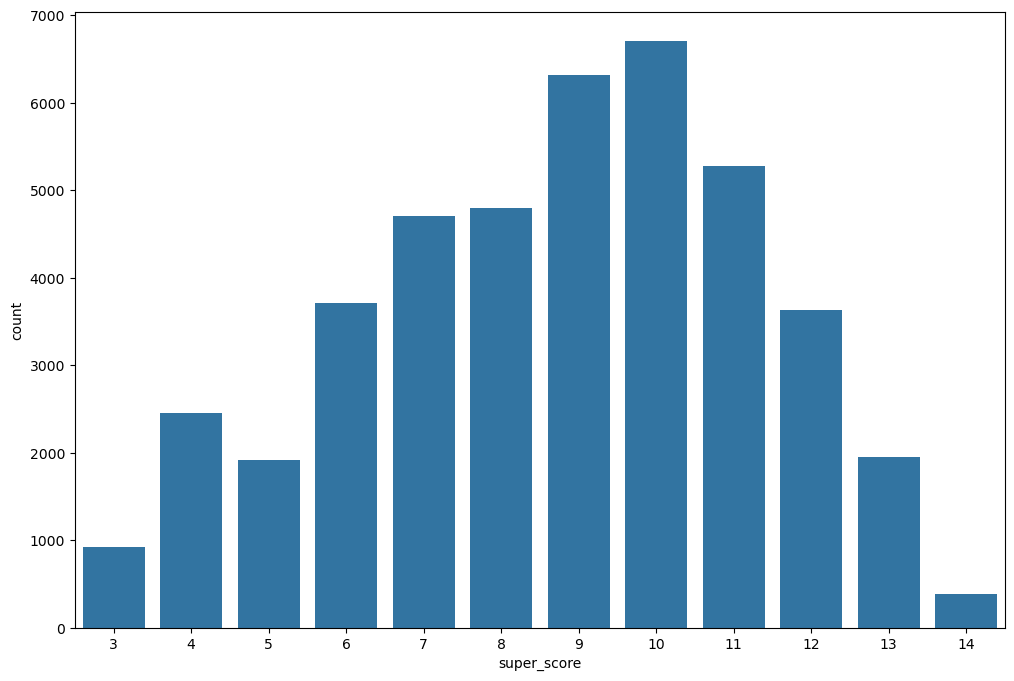

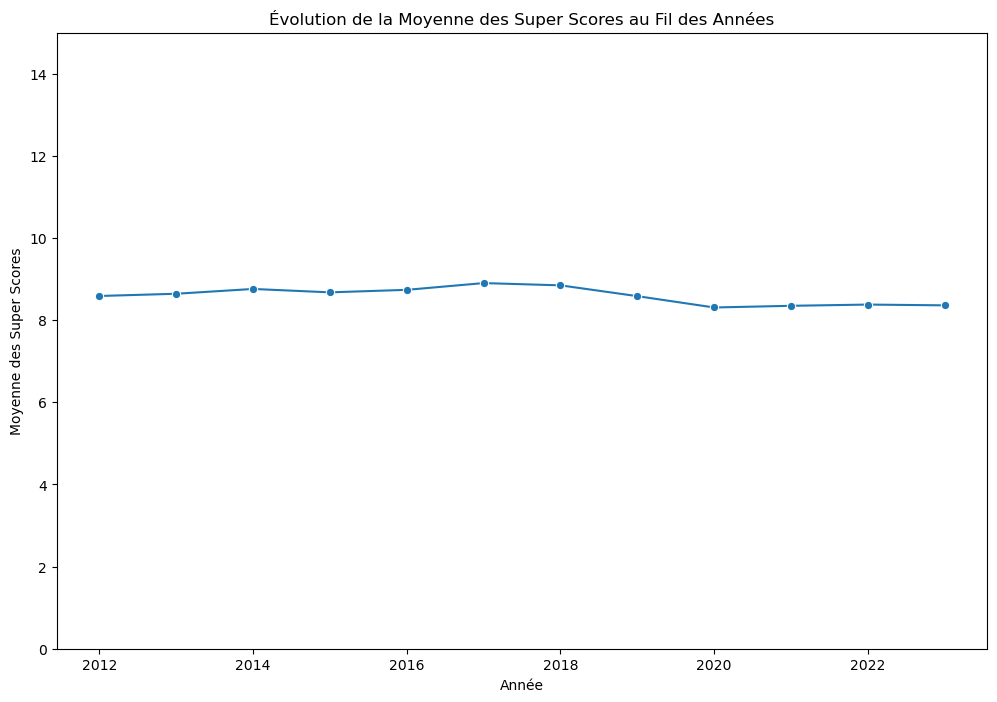

In [ ]:
def plot_histogram(score):

    fig = plt.figure(figsize=(12, 8))

    data_graph = df_france[[score]].copy()
    sns.countplot(x=score, data=data_graph)
    plt.xticks = []  

    plt.show()

# Utilisation de la fonction avec votre DataFrame et la colonne "super_score"
plot_histogram("super_score")


On affiche l'évolution du super_score moyen

In [ ]:
# Calculer la moyenne par date
mean_values = df_france.groupby(df_france['created_datetime'].dt.year)['super_score'].mean().reset_index()
mean_values = mean_values.rename(columns={'created_datetime': 'year', 'super_score': 'mean_super_score'})

# Création d'un graphique 
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='mean_super_score', data=mean_values, marker='o')

# Ajout des titres et des labels
plt.title('Évolution de la Moyenne des Super Scores au Fil des Années')
plt.xlabel('Année')
plt.ylim(0, 15)

plt.ylabel('Moyenne des Super Scores')

# Afficher le graphique
plt.show()

Nous avons une distribution du super_score parmi les produits et l'évolution de la moyenne du super_score. 

Nous constatons que l'immense majorité des produits a un score moyen, compris entre 7 et 10. Ainsi en prenant en compte la dimension nutritionnelle, industriel et écologique, les produits du marché français ont des scores moyens. 
Les produits parfaitement bons (score de 3) ou parfaitement mauvais (score de 14) sont rares. Ils existent ainsi un grande nombre de produits bons dans une des dimensions étudiés mais médiocres dans les autres. 
Il ne semble ainsi pas avoir de lien entre les différents scores (Nutriscore, Ecoscore, Nova-score), ce qui limite la possibilité de trouver des alimentes supérieurs dans toutes les catégories. 

Par ailleurs, nous constatons que la qualité des aliments vendus n'évolue pas dans le temps. Le score moyen demeure proche de 8,5 et est relativement stable dans le temps. A priori, l'introduction progressive des scores n'a donc pas permis l'amélioration de la qualité générale des ingrédients. 
Les scores ont ainsi un impact limité sur l'évolution des habitudes de consommations. 

Nous avons étudié la qualité de la nourriture sous 3 aspects : écologique, nutritionelle et transformation. 
Grâce à une heatmap, nous allons pouvoir observer s'il n'existe pas  des corrélations claires entre les variables et les scores étudiés. 




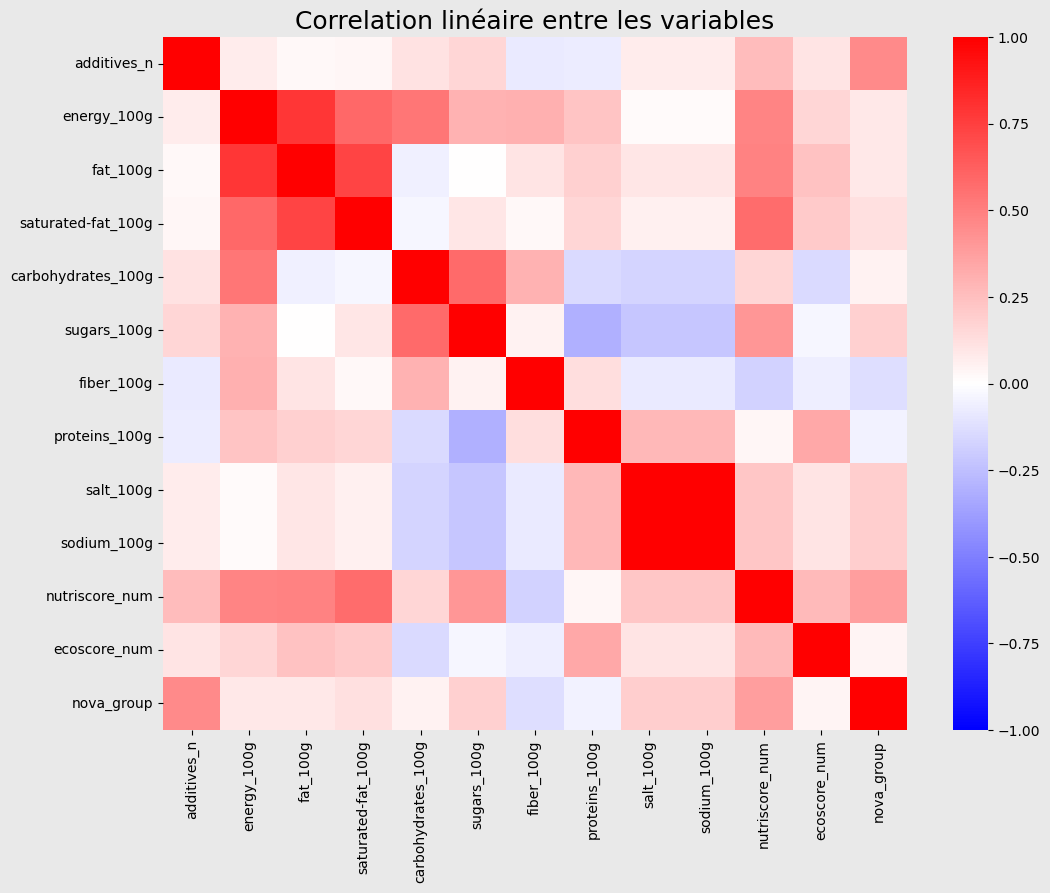

In [ ]:
#On définit les variables étudiées
variables = ['additives_n','energy_100g', 'fat_100g'
        , 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutriscore_num', 'ecoscore_num', 'nova_group']

x=df_france.loc[:, variables]
x = x.dropna()
 
#calculate the correlation matrix
corr = x.corr()

lab=x.columns
#plot the heatmap
fig=plt.figure(figsize=[12,9])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)

plt.title("Correlation linéaire entre les variables",size=18)
ax=sns.heatmap(corr, vmin=-1, vmax=1,cmap="bwr",
        xticklabels=variables,
        yticklabels=variables)


Nous pouvons déceler plusieurs liens. 
Tout d'abord, on constate que le Nutriscore est corrélé (positivement ou négativement selon les variables) avec les informations nutrionelles (fibre, graisse, sel, sodium,énergie, protéine). Les corrélations sont postives quand les produits sont néfastes pour la santé (sucre et sel) et négative dans le cas inverse (fibre). Il faut rappeler que plus le Nutriscore est faible, plus l'ingrédient est bon pour la santé. 
Cela est cohérent avec la méthode de calcul du Nutriscore, qui prend en compte ces paramètres. 

Le Score NOVA est corrélé positivement avec le nombre d'additifs et la présence de sel et de sucre. En effet les produits issus de procédés indutrielles sont souvent sucrés ou salé afin de plaire aux consommateurs, et cela au détriment de la santé. Nous observons d'ailleurs une corrélation postive avec le Nutriscore. 
Nous constatons néanmoins que le NOVA_Score et l'Ecosore ne sont pas corrélé. Le processus de transformation subi par un produit n'influence pas son impact sur l'environnement. 

L'Ecoscore n'est corrélé que de manière marginale avec les variables utilisées. L'impact sur l'environnement d'un produit ne dépend ni de sa valeur nutritionnele, ni de son procédé de transformation. Cela vient renforcer l'hypothèse qu'on ne peut trouver de catégories d'aliments bons dans les trois dimensions étudiées.

## II.B Création de nouveaux scorings

Nous allons désormais élargir notre analyse en travaillant deux axes:
- nous allons tenter de reproduire le nova score, en créant un scoring de transformation pour voir si nous retrouvons bien les tendances vues avec le nova score. Cela pourrait nous permettre d'étendre le nova score à l'ensemble de la base de donnée openfoodfacts pour les produits qui n'ont pas de nova score renseigné par exemple. Mais dans le cadre du projet, nous l'utiliseront pour nos clustering à la fin. 
- créer de nouveaux critères pour mesurer la qualité alimentaire. Ici nous traiterons le cas de la provenance des produits. 

Nous allons créé une variable de scoring pour chacun des deux axes mentionnées avant de faire une comparaison avec les scores étudiés au dessus. 

1. Analyse du degré de transformation

Pour cette variable, le principal problème est la quantification de la transformation du produit alimentaire. Une approche simple serait de considérer que plus un produit alimentaire contient d'ingrédient, plus il est transformé. 

En s'appuyant sur les critères du nova-score, on va essayer de reproduire son scoring en appliquant les critères décrits ici: https://scanup.fr/degre-de-transformation-des-aliments-la-classification-nova/ .

D'abord, on va donc identifier les produits de la base qui correspondent à des produits naturels (fruits, légumes, poisson qui sont tels quels) en utilisant la catégorie food_groups_tags, avant de faire une analyse des ingrédients sur les produits qu'on identifie comme étant non bruts. 
On observe sur le graphique généré précédemment qu'environ 30% des produits ont la variable ingredient_text renseigné, ce qui nous permettra de générer un nova score sur environ 30% des produits de la base. 
La variable food_groups_tags nous permettra de corriger les cas déviants les plus problématiques après la première étape de scoring. 

On fait un premier test de scoring en prenant en compte uniquement le nombre d'ingédients listés dans le produit. On veut d'abord regarder comment la variable est renseignée pour choisir le meilleur séparateur d'ingrédiant qui pourra nous permettre de trouver le plus justement possible le nombre d'ingrédents sachant qu'à posteriori, on a vu que la variable n'était pas renseignée de manière homogène. 

On voit que le renseignement de la variable ingredients_text est assez hétérogène: On a donc mis en évidence plusieurs manières de comptabiliser le nb d'ingrédients:
- en comptant le nombre de virgules dans la chaîne de caractère
- en comptant le nombre d'espaces dans la chaîne de caractère (plus fiable mais tend à augumenter le nb d'ingrédient par rapport à la réalité)
- le nombre de points virgule

Finalement, compter les espaces est trop hazardeux, donc on va se concentrer sur le comptage des virgules. On décide donc finalement de compter la somme des virgules et des points virgules puisqu'en général, les deux séparateurs ne sont pas utilisés simultanément, donc compter leur somme nous permettra de balayer le plus de liste d'ingrédients possible tout en faussant le moins possible. 

Il nous restera à traiter ensuite du cas des listes d'ingrédients sans séparateurs. 


In [ ]:
# Compter le nombre d'espaces dans chaque chaîne de caractères de 'ingredients_text'
df_france['nombre_ingredients'] = df_france['ingredients_text'].apply(lambda x: x.count(',') + x.count(';'))

# Afficher le DataFrame avec la nouvelle colonne
print(df_france[['ingredients_text', 'nombre_ingredients']])

# Obtenir un tableau d'occurrences du nombre d'ingrédients
occurrences_nb_ingredients = df_france['nombre_ingredients'].value_counts()

# Afficher le tableau d'occurrences
print(occurrences_nb_ingredients)

                                        ingredients_text  nombre_ingredients
0      Édulcorants (Sorbitol, Aspartame), agent d'enr...                   5
1      Sucre, _Arachide_, pâte de cacao, lait écrémé ...                  15
2      Farine de blé 33%, sucre, huile de colza, œufs...                  11
3      Farine de _blé_ 27%, chocolat noir 18% (pâte d...                  17
4      Filet de poulet (origine : France), eau, sel, ...                  15
...                                                  ...                 ...
42771  Eau, Extrait de Fleur de Chrysanthème, sucre e...                   3
42772                  Tuna [Fish], Sunflower Oil, Salt.                   2
42773  Pâte de cacao (Honduras), sucre de canne, beur...                   3
42774  Viande de volaille 73 % ; peau de poulet 13 % ...                  12
42775  Chocolat au LAIT* 66% (sucre de canne blond*, ...                   9

[42776 rows x 2 columns]
nombre_ingredients
0      6347
3      2930
2      

On va établir le scoring suivant: 
- produit brut: 1 si le nombre d'ingrédients est égal à 1 ou 2; 
- ingrédient culiaire: 2 si le nom d'ingrédients est 3 ou 4; 
- produit simplement transformé: 3 si le nombre d'ingrédiants est situé entre 5 et 7 et 
- produit très transformé: 4 si le nombre d'ingrédients est au delà de 8. 

In [ ]:
# Créer une nouvelle colonne 'score' en fonction du nombre d'ingrédients
df_france['score_transformation'] = df_france['nombre_ingredients'].apply(lambda n: 1 if n <= 2 else (2 if n <= 4 else (3 if n <= 7 else 4)))

# Afficher le DataFrame avec la nouvelle colonne 'score'
#print(df_france[['ingredients_text', 'nombre_ingredients', 'score_transformation']])

# Obtenir un tableau d'occurrences du scoring sur la transformation des produits
occurrences_scoring_transformation = df_france['score_transformation'].value_counts()

# Afficher le tableau d'occurrences
print(occurrences_scoring_transformation)


score_transformation
4    20461
1    11534
3     5426
2     5355
Name: count, dtype: int64


Pour tester le scoring qu'on vient de créer, nous proposons de regarder les occurences de food_groups_tags qu'on retrouve parmi les produits qu'on a classé en scoring 1 pour la transformation pour voir s'il y a une certaine cohérence (nous ne sommes pas censé retrouver des buscuits par exemple)

In [ ]:
# Filtrer les produits avec un score de 1
score_1_products = df_france[df_france['score_transformation'] == 1]

# Afficher les occurrences de food_groups_tags pour les produits avec un score de 1
occurrences_score_1 = score_1_products['food_groups_tags'].value_counts()

# Afficher les résultats
print(occurrences_score_1)


food_groups_tags
en:cereals-and-potatoes,en:cereals                      2120
en:beverages,en:unsweetened-beverages                   1047
en:fruits-and-vegetables,en:vegetables                   858
en:sugary-snacks,en:sweets                               662
en:fruits-and-vegetables,en:fruits                       639
en:fish-meat-eggs,en:fish-and-seafood,en:fatty-fish      556
en:milk-and-dairy-products,en:milk-and-yogurt            528
en:fats-and-sauces,en:fats                               421
en:cereals-and-potatoes,en:legumes                       418
en:milk-and-dairy-products,en:cheese                     409
en:fruits-and-vegetables,en:dried-fruits                 393
en:salty-snacks,en:nuts                                  381
en:fish-meat-eggs,en:meat,en:poultry                     378
en:fish-meat-eggs,en:processed-meat                      238
en:fish-meat-eggs,en:meat,en:meat-other-than-poultry     230
en:sugary-snacks,en:biscuits-and-cakes                   221
en:salt

On va vérifier les occurences étranges et voir ce qu'on peut faire pour corriger ces défauts 

In [ ]:
# Filtrer les produits où food_groups_tags prend la valeur "en:sugary-snacks,en:biscuits-and-cakes"
filtered_products = score_1_products[score_1_products['food_groups_tags'] == 'en:sugary-snacks,en:biscuits-and-cakes']

# Afficher la colonne 'product_name' des produits filtrés
print(filtered_products[['product_name', 'ingredients_text']])


                                           product_name  \
72                     Chocolate chip shortbread rounds   
94                          Oatberry Cluster Mini Bites   
276                                       Minis Donut’s   
2966                   LU La Paille d'Or aux Framboises   
4602   BN - French Casse Croute Biscuits, 375g (13.2oz)   
...                                                 ...   
38429   P'tit Déj - Biscuits nappés de chocolat au lait   
39280                 Mini Palmiers Biscuits feuilletés   
39283                                       Coco nature   
40777                                        Bastoncini   
41411                   Petites meringues aux noisettes   

                                        ingredients_text  
72     Butter (Milk) (33%) Rice Flour • eoit.ab/e Sug...  
94     Sucre - Huile de palme • _Avoine_ - Riz souffl...  
276    Mini Donut Sucré (sur yele) (farine ( BLE) hui...  
2966   Sirop de glucose-fructose — Framboises 37.1% —..

Finalement, pour régler le problème des listes d'ingrédients sans séparateurs, on va utiliser la catégorie des produits transformés renseigné dans food_groups_tags pour les mettre directement en score 4, ce qui permettra d'enlever ces passagers clandestins des catégories 1, 2 et 3. 

In [ ]:
# Liste des catégories de produits transformés
categorie_produits_transformes = ['en:composite-foods,en:one-dish-meals',
                                  'en:composite-foods,en:pizza-pies-and-quiches',
                                  'en:sugary-snacks,en:biscuits-and-cakes',
                                  'en:salty-snacks,en:salty-and-fatty-products',
                                  'en:salty-snacks,en:appetizers',
                                  'en:composite-foods,en:sandwiches',
                                  'en:sugary-snacks,en:chocolate-products']

# Mise à jour du score pour les produits dans la liste des catégories de produits transformés
df_france.loc[df_france['food_groups_tags'].isin(categorie_produits_transformes), 'score_transformation'] = 4







On refait un test pour voir si les scorings 1 clandestins ont été corrigés

In [ ]:
# Filtrer les produits avec un score de 1
score_1_products = df_france[df_france['score_transformation'] == 1]

# Afficher les occurrences de food_groups_tags pour les produits avec un score de 1
occurrences_score_1 = score_1_products['food_groups_tags'].value_counts()

# Afficher les résultats
print(occurrences_score_1)

food_groups_tags
en:cereals-and-potatoes,en:cereals                      2120
en:beverages,en:unsweetened-beverages                   1047
en:fruits-and-vegetables,en:vegetables                   858
en:sugary-snacks,en:sweets                               662
en:fruits-and-vegetables,en:fruits                       639
en:fish-meat-eggs,en:fish-and-seafood,en:fatty-fish      556
en:milk-and-dairy-products,en:milk-and-yogurt            528
en:fats-and-sauces,en:fats                               421
en:cereals-and-potatoes,en:legumes                       418
en:milk-and-dairy-products,en:cheese                     409
en:fruits-and-vegetables,en:dried-fruits                 393
en:salty-snacks,en:nuts                                  381
en:fish-meat-eggs,en:meat,en:poultry                     378
en:fish-meat-eggs,en:processed-meat                      238
en:fish-meat-eggs,en:meat,en:meat-other-than-poultry     230
en:cereals-and-potatoes,en:breakfast-cereals             188
en:fish

Nous allons désormais régressé le Score Nova sur le scoring obtenue pour voir sa pertinence. 

On utilise une méthode de régression ordinale au regard de la nature des valeurs considérées, qui sont des entiers avec une faibles dispersion. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming df_france is your DataFrame and the column names are correct
X = df_france[["score_transformation"]]  # Use double brackets to create a DataFrame
y = df_france["nova_group"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the linear regression model
linear_regressor = LinearRegression()

# Fit the model
linear_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get the coefficients and intercept
coefficients = linear_regressor.coef_
intercept = linear_regressor.intercept_

# Display coefficients and intercept
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')


Mean Squared Error: 0.6347530691239128
Coefficients: [0.58495424]
Intercept: 1.4508959619378703


Nous avons un Mean Square Error relativement faible et un coefficient de 0,58. La régression valide l'usage du scoring. Il permet de bien prendre en compte l'aspect transformation sans toutefois l'expliquer complètement. L'usage de ce scoring  peut être donc prise en compte pour évaluer la qualité d'un aliment. 

2. Origine des aliments 

On va maintenant s'intéresser aux labels des produits alimentaires qu'on considère grâce à la variable labels_tags et tenter de faire une variable de scoring qui nous permettrait de quantifier sa qualité en fonction des labels qu'on lui a accordé quant à sa provenance ou sa production (étiquette bio ou made in France notamment)

In [ ]:
# Afficher les occurrences qui apparaissent plus de 1000 fois dans la colonne 'labels_tags'
occurrences_plus_de_1000 = df_france['labels_tags'].value_counts()[df_france['labels_tags'].value_counts() > 1000]

# Afficher le tableau d'occurrences
print(occurrences_plus_de_1000)


labels_tags
en:green-dot    2266
Name: count, dtype: int64


On va considérer le scoring suivant pour quantifier l'origine et la provenance des produits alimentaires. 
On se basera sur la provenance (France/UE) et la catégorie de bio 
On définera les scores suivants:
- 1 si le produit est français et bio 
- 2 si le produit est européen et bio 
- 3 si le produit est français
- 4 si le produit est bio 
- 5 sinon 

On a choisi de faire du plus petit au plus grand pour décrire l'évolution du "meilleur" au "pire" pour se caler sur la logique du nutriscore, ce qui nous facilitera les comparaisons par la suite. 

Pour mesurer les différents attributs, on va faire uen analyse dans les chaînes de caractère des labels: s'il y a france ou fr on lui attribuera le fait qu'il est français par exemple. 

                                             labels_tags  score_labels
0      en:low-or-no-sugar,en:contains-a-source-of-phe...             5
1                                       en:contains-gmos             5
2            en:green-dot,en:no-colorings,en:no-palm-oil             5
3      en:free-range,en:no-preservatives,en:free-rang...             3
4      en:french-meat,en:french-poultry,en:nutriscore...             3
...                                                  ...           ...
42771                       en:no-preservatives,en:halal             5
42772  en:sustainable,en:sustainable-fishery,en:susta...             5
42773  en:fair-trade,en:organic,en:eu-organic,en:fair...             1
42774     en:french-meat,en:french-poultry,en:nutriscore             3
42775                           en:organic,en:eu-organic             4

[42776 rows x 2 columns]


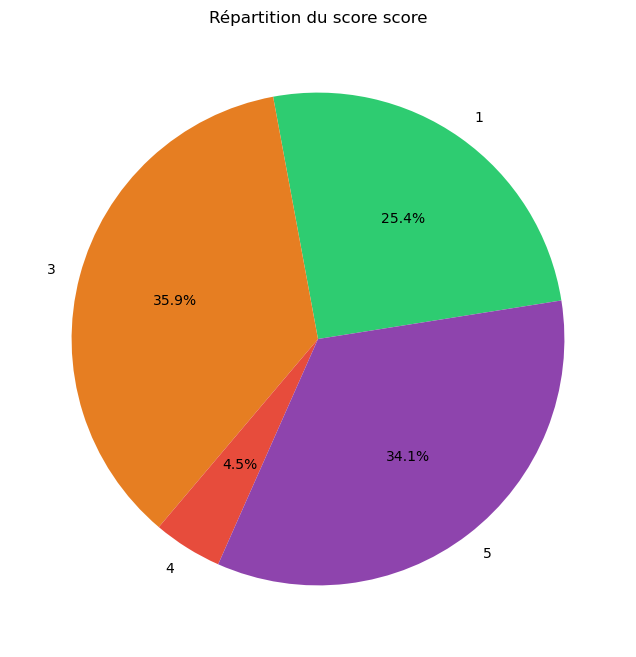

In [ ]:
# Créer une nouvelle colonne 'score_labels' initialisée à 0
df_france['score_labels'] = 0

# Définir des critères et attribuer des scores
critere_bio_france = df_france['labels_tags'].str.contains('france|fr', case=False) & df_france['labels_tags'].str.contains('bio|organic', case=False)
critere_eu_bio = df_france['labels_tags'].str.contains('eu', case=False) & df_france['labels_tags'].str.contains('bio|organic', case=False)
critere_france = df_france['labels_tags'].str.contains('france|fr', case=False)
critere_bio = df_france['labels_tags'].str.contains('bio|organic', case=False)

# Attribuer des scores en fonction des critères (inverser l'ordre)
df_france.loc[~(critere_bio_france | critere_eu_bio | critere_france | critere_bio) & (df_france['score_labels'] < 1), 'score_labels'] = 5
df_france.loc[critere_bio & (df_france['score_labels'] < 2), 'score_labels'] = 4
df_france.loc[critere_france & (df_france['score_labels'] < 3), 'score_labels'] = 3
df_france.loc[critere_eu_bio & (df_france['score_labels'] < 4), 'score_labels'] = 2
df_france.loc[critere_bio_france, 'score_labels'] = 1

# Afficher le DataFrame avec la nouvelle colonne de scoring
print(df_france[['labels_tags', 'score_labels']])

#affichage des scores dans la base 
plot_pie("score_labels")


Nous observons que notre scoring permet une nouvelle répartition des alimentes de la base selon 4 catégories. 
Nous constatons que 25% des produits sont de grande qualitée, car bio et français, tandis que plus d'un tiers des produits ne sont ni bio ni européeens.

# Partie 3 Clustering des produits

Nous allons désormais utiliser des méthodes de clustering pour déterminer des aliments de qualité supérieures en prenant en compte les différentes dimensions étudiées.


Nous allons avoir recours à deux algorithmes (DBSCAN et K-Means) pour réaliser le clustering. 

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) et K-Means sont deux algorithmes de clustering distincts avec des approches et des caractéristiques différentes. DBSCAN est basé sur la densité, regroupant les points de données proches les uns des autres avec un nombre suffisant de voisins, et il peut identifier le bruit. Il est adapté aux formes de clusters irrégulières et ne nécessite pas de spécifier le nombre de clusters à l'avance. En revanche, K-Means partitionne les données en un nombre prédéfini de clusters en fonction de la distance moyenne entre les points de données et les centroïdes de clusters. Il suppose des clusters sphériques et peut être sensible aux configurations initiales, mais il est efficace sur de grands ensembles de données.

On commence par utiliser la méthode des k-means

/opt/mamba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


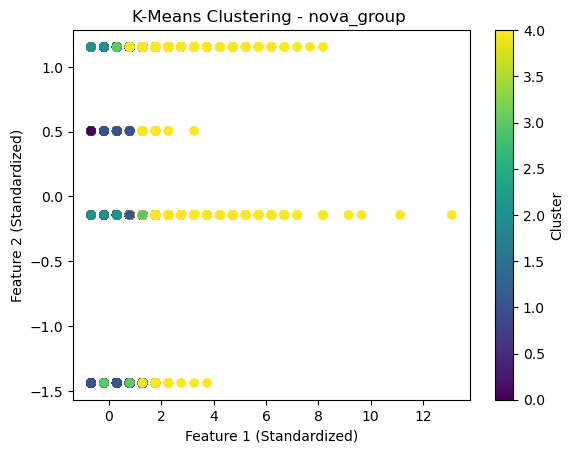

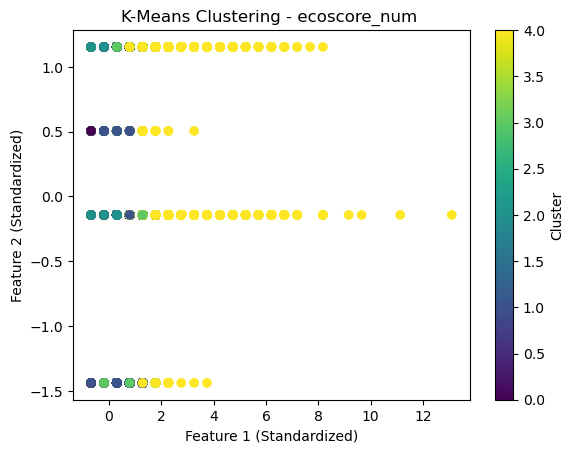

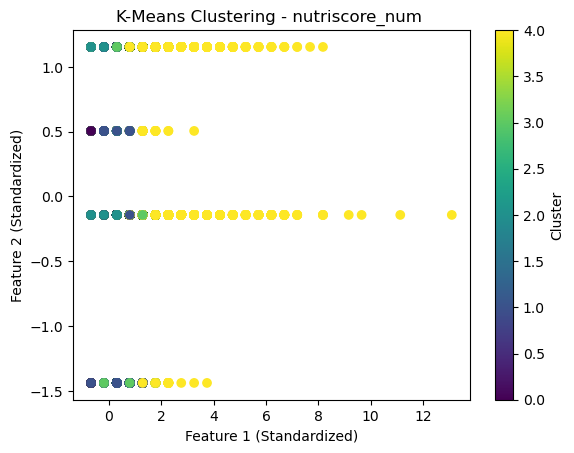

In [ ]:
#On sélectionne les données qu'on va utiliser pour le clustering

selected_columns = ['additives_n', "score_labels", 'nutriscore_num', 'ecoscore_num',"score_transformation" ,'nova_group', 'energy_100g']


# On sélectionne les données dans la base
df_france_selected = df_france[selected_columns]

# On préprocess les données
scaler = StandardScaler()
df_france_scaled = scaler.fit_transform(df_france_selected)

# On utilise l'algorithme K-Means pour le clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(df_france_scaled)

# Fonction pour afficher les clusters avec K-Means
def plot_clusters_kmeans(score, title_suffix=""):
    plt.scatter(df_france_scaled[:, 0], df_france_scaled[:, 1], c=clusters, cmap='viridis')
    plt.title(f'K-Means Clustering - {score} {title_suffix}')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.colorbar(label='Cluster')
    plt.show()

# Affiche les clusters pour différentes caractéristiques avec K-Means
plot_clusters_kmeans("nova_group")
plot_clusters_kmeans("ecoscore_num")
plot_clusters_kmeans("nutriscore_num")

On constate qu'on a du mal à avoir des clusters clairement définis selon nos trois dimensions. On va essayer de résoudre ce problème avec un autre algorithme.

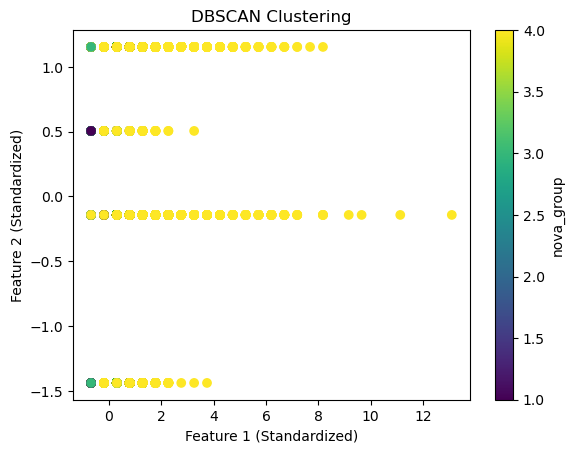

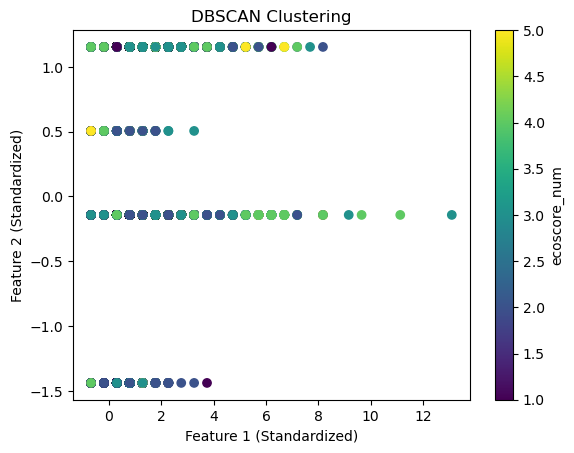

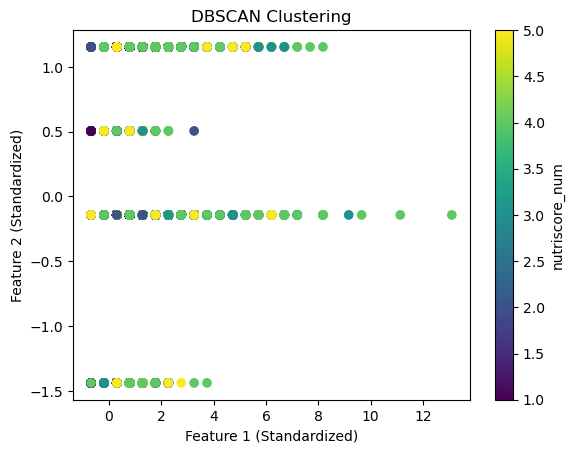

In [ ]:

# On utilise désormais l'algorithme DBSCAN pour le  clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  
clusters = dbscan.fit_predict(df_france_scaled)

# On affiche les clusters
def plot_clusters(score): 
    plt.scatter(df_france_scaled[:, 0], df_france_scaled[:, 1], c=df_france_selected[score], cmap='viridis')
    plt.title('DBSCAN Clustering')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.colorbar(label=score)

    plt.show()

plot_clusters("nova_group")
plot_clusters("ecoscore_num")
plot_clusters("nutriscore_num")



Nous retrouvons les mêmes résulats qu'avec la méthode précédente. Nous devons donc conclure de l'impossibilité de réaliser des clusters qu'il est impossible de déterminer un groupe de produits alimentaires ayant des caractéristiques propres dans les dimensions étudiées.

# Conclusion

Ce projet a débuté avec la question de savoir si les étiquetages nutritionnels contribuent à une meilleure consommation alimentaire en France. Nous avons constaté une légère amélioration de la qualité des ingrédients depuis l'introduction des scores, bien que cette amélioration puisse être attribuée à des facteurs externes tels que des politiques publiques de santé ou d'écologie. Les scores n'ont pas provoqué de changements significatifs dans les habitudes alimentaires.

En examinant l'utilisation du Nutriscore, de l'Ecoscore et du Nova-score pour déterminer des produits alimentaires de meilleure qualité, nous avons constaté qu'il n'y a pas de corrélation significative entre le Nova-score et l'Ecoscore. Cependant, il existe un lien entre le Nutriscore et l'Ecoscore. Les indicateurs alimentaires semblent ne pas contribuer de manière significative à l'amélioration de la qualité des produits alimentaires en France, mais ils restent des indicateurs valables pour comparer la qualité alimentaire de produits similaires (la similarité réduit les biais).

Par ailleurs, il est important de noter que les données utilisées dans cette analyse sont remplies par des contributeurs variés, ce qui peut entraîner des biais de sélection et influencer la qualité des observations. Cela souligne la nécessité de prendre en compte la nature diverse des contributeurs lors de l'interprétation des résultats de l'analyse.